In [ ]:
# Phase 1: Data Collection & Preprocessing

## Objectives
- Collect the dataset from Ontario's Open Data Portal.
- Clean and preprocess the data to ensure it is ready for analysis.
- Document all steps for reproducibility.

---

## Tasks

### 1. **Download Dataset**
   - Source: [Ontario's Open Data Portal](https://data.ontario.ca/).
   - Dataset: Energy Use and Greenhouse Gas Emissions in the Broader Public Sector.
   - Files:
     - `2021_final_bps_dataset.xlsx`
     - `2022_final_data_set.xlsx`
     - `2023_final_data_set.xlsx`

### 2. **Understand Dataset Structure**
   - Inspect the dataset to understand its structure, columns, and data types.
   - Identify key columns:
     - `Sector`, `Subsector`, `Organization`, `Property Name`, `Primary Property Type - Self Selected`.
     - Energy use columns: `Electricity Use - Grid Purchase (kWh)`, `Natural Gas Use (GJ)`, etc.
     - Emissions columns: `Total (Location-Based) GHG Emissions (Metric Tons CO2e)`.

 


# To check the three datasets (2021, 2022, and 2023) have the same number of columns and columns names, we load the dataset compaere the number of columns and check if the column are identical across all datasets.

In [2]:
import pandas as pd

# to Load datasets
df_2021 = pd.read_excel(r"C:\Master of computer science\Data analysis with python\project\2021_final_bps_dataset.xlsx")
df_2022 = pd.read_excel(r"C:\Master of computer science\Data analysis with python\project\2022_final_data_set.xlsx")
df_2023 = pd.read_excel(r"C:\Master of computer science\Data analysis with python\project\2023_final_data_set.xlsx")

# to check the number of columns
print(f"Columns in 2021 dataset: {len(df_2021.columns)}")
print(f"Columns in 2022 dataset: {len(df_2022.columns)}")
print(f"Columns in 2023 dataset: {len(df_2023.columns)}")

# Comparision of column names in different datasets
print("\nColumns match across datasets?")
print(df_2021.columns.equals(df_2022.columns) and df_2022.columns.equals(df_2023.columns))

# to identify differences in column names (if any)
if not df_2021.columns.equals(df_2022.columns):
    print("\nDifferences between 2021 and 2022 columns:")
    print(set(df_2021.columns) ^ set(df_2022.columns))

if not df_2022.columns.equals(df_2023.columns):
    print("\nDifferences between 2022 and 2023 columns:")
    print(set(df_2022.columns) ^ set(df_2023.columns))

if not df_2021.columns.equals(df_2023.columns):
    print("\nDifferences between 2021 and 2023 columns:")
    print(set(df_2021.columns) ^ set(df_2023.columns))
    


Columns in 2021 dataset: 58
Columns in 2022 dataset: 58
Columns in 2023 dataset: 58

Columns match across datasets?
False

Differences between 2021 and 2022 columns:
{'Diesel Use (GJ)', 'Calculated with new source factors (Yes/No)', 'Diesel #2 Use (GJ)', 'Year'}

Differences between 2021 and 2023 columns:
{'Diesel Use (GJ)', 'Calculated with new source factors (Yes/No)', 'Diesel #2 Use (GJ)', 'Year'}


In [3]:

# to map the mismatched column names in 2021 to match 2022 and 2023
column_mapping = {
    'Calculated with new source factors (Yes/No) (2021)': 'Calculated with new source factors (Yes/No)',
    'Diesel #2 Use (GJ) (2021)': 'Diesel #2 Use (GJ)',
    'Diesel Use (GJ) (2021)': 'Diesel Use (GJ)'
}

# Rename columns in the 2021 dataset
df_2021.rename(columns=column_mapping, inplace=True)

# to check column names after renaming
print("2021 Columns after renaming:", df_2021.columns.tolist())
print("2022 Columns:", df_2022.columns.tolist())
print("2023 Columns:", df_2023.columns.tolist())

# to add 'Year' column to each dataset (if not already present)
df_2021['Year'] = 2021
df_2022['Year'] = 2022
df_2023['Year'] = 2023

# to merge all datasets
df_all = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

# to view the merged dataset
print(df_all.head())  # Preview the first few rows
print(df_all['Year'].value_counts())  # Check the distribution of years

# to save the merged dataset to an Excel file which will be our final dataset
output_file = "merged_bps_data.xlsx"
df_all.to_excel(output_file, index=False)
print(f"Merged dataset saved to {output_file}")



2021 Columns after renaming: ['Sector', 'Subsector', 'Organization', 'Property Name', 'Primary Property Type - Self Selected', 'Portfolio Manager Property ID', 'Portfolio Manager Parent Property ID', 'Parent Property Name', 'Year Ending', 'Address', 'City', 'Postal Code', 'Property GFA - Self-Reported (m²)', 'Number of Buildings', 'Custom Property ID 1 - Name', 'Custom Property ID 1 - Value', 'Custom Property ID 2 - Name', 'Custom Property ID 2 - Value', 'Custom Property ID 3 - Name', 'Custom Property ID 3 - Value', 'Electricity Use - Grid Purchase (kWh)', 'Electricity Use - Grid Purchase (GJ)', 'Natural Gas Use (therms)', 'Natural Gas Use (GJ)', 'Fuel Oil #1 Use (GJ)', 'Fuel Oil #2 Use (GJ)', 'Fuel Oil #4 Use (GJ)', 'Fuel Oil #5 & 6 Use (GJ)', 'Diesel #2 Use (GJ)', 'Kerosene Use (GJ)', 'Propane Use (GJ)', 'District Steam Use (GJ)', 'District Hot Water Use (GJ)', 'District Chilled Water Use (GJ)', 'Wood Use (GJ)', 'Site Energy Use (GJ)', 'Source Energy Use (GJ)', 'Site EUI (GJ/m²)', 'S

# we merge the three dataset into one file.
 After joining the data set, a quick review of dataset,and identification of missing values.

In [7]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_excel(r"C:\Master of computer science\Data analysis with python\project\merged_bps_data.xlsx")

# to view the final dataset
print("Initial Dataset Info:")
print(df.info())
print("\nMissing Values per Column:")
print(df.isnull().sum())




Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38404 entries, 0 to 38403
Data columns (total 59 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Sector                                                         38404 non-null  object        
 1   Subsector                                                      38404 non-null  object        
 2   Organization                                                   38404 non-null  object        
 3   Property Name                                                  38404 non-null  object        
 4   Primary Property Type - Self Selected                          38404 non-null  object        
 5   Portfolio Manager Property ID                                  38404 non-null  int64         
 6   Portfolio Manager Parent Property ID                           38404 non

Data cleaning and conversinon of columns into numeric:

In [9]:
# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(column):
    # Remove non-numeric characters (e.g., commas, spaces, text)
    column = column.replace({',': '', ' ': '', '[^0-9.-]': ''}, regex=True)
    # Convert to numeric, coercing errors (e.g., text) to NaN
    return pd.to_numeric(column, errors='coerce')

# List of columns to clean and convert to numeric
numeric_columns = [
    'Electricity Use - Grid Purchase (kWh)', 'Electricity Use - Grid Purchase (GJ)',
    'Natural Gas Use (therms)', 'Natural Gas Use (GJ)',
    'Fuel Oil #1 Use (GJ)', 'Fuel Oil #2 Use (GJ)', 'Fuel Oil #4 Use (GJ)',
    'Fuel Oil #5 & 6 Use (GJ)', 'Diesel #2 Use (GJ)', 'Kerosene Use (GJ)',
    'Propane Use (GJ)', 'District Steam Use (GJ)', 'District Hot Water Use (GJ)',
    'District Chilled Water Use (GJ)', 'Wood Use (GJ)', 'Site Energy Use (GJ)',
    'Source Energy Use (GJ)', 'Site EUI (GJ/m²)', 'Site EUI (ekWh/sqft)',
    'Source EUI (GJ/m²)', 'Source EUI (ekWh/sqft)',
    'Weather Normalized Site Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
    'Weather Normalized Site EUI (GJ/m²)', 'Weather Normalized Site EUI (ekWh/sqft)',
    'Weather Normalized Source EUI (GJ/m²)', 'Weather Normalized Source EUI (ekWh/sqft)',
    'Total (Location-Based) GHG Emissions (Metric Tons CO2e)',
    'Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)',
    'Drinking Water Treatment & Distribution - Average Flow (m³PD)',
    'Wastewater Treatment Plant - Average Influent Flow (m³PD)'
]

# to clean and convert numeric columns
df[numeric_columns] = df[numeric_columns].apply(clean_and_convert_to_numeric)

# to check conversion
print("\nData Types After Conversion:")
print(df[numeric_columns].dtypes)


Data Types After Conversion:
Electricity Use - Grid Purchase (kWh)                            float64
Electricity Use - Grid Purchase (GJ)                             float64
Natural Gas Use (therms)                                         float64
Natural Gas Use (GJ)                                             float64
Fuel Oil #1 Use (GJ)                                             float64
Fuel Oil #2 Use (GJ)                                             float64
Fuel Oil #4 Use (GJ)                                             float64
Fuel Oil #5 & 6 Use (GJ)                                         float64
Diesel #2 Use (GJ)                                               float64
Kerosene Use (GJ)                                                float64
Propane Use (GJ)                                                 float64
District Steam Use (GJ)                                          float64
District Hot Water Use (GJ)                                      float64
District Chilled Wate

Handling Missing Values:
1. Fill missing non-numeric values with a placeholder (e.g., "Unknown").
2. Remove duplicate rows from the dataset.

In [17]:

# to fill missing values for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# to fill missing values for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna("Unknown")

# to remove duplicates
df.drop_duplicates(inplace=True)
#print(df[numeric_cols])
#print(df[non_numeric_cols])
print(df.isnull().sum())

Sector                                                           0
Subsector                                                        0
Organization                                                     0
Property Name                                                    0
Primary Property Type - Self Selected                            0
Portfolio Manager Property ID                                    0
Portfolio Manager Parent Property ID                             0
Parent Property Name                                             0
Year Ending                                                      0
Address                                                          0
City                                                             0
Postal Code                                                      0
Property GFA - Self-Reported (m²)                                0
Number of Buildings                                              0
Custom Property ID 1 - Name                                   

6. Removal of Outliers
the Interquartile Range (IQR) method is used to detect and remove outliers from the Electricity Use - Grid Purchase (kWh) column.


In [15]:

# Remove outliers (example: 'Electricity Use - Grid Purchase (kWh)')
# if 'Electricity Use - Grid Purchase (kWh)' in df.columns:
#     Q1 = df['Electricity Use - Grid Purchase (kWh)'].quantile(0.25)
#     Q3 = df['Electricity Use - Grid Purchase (kWh)'].quantile(0.75)
#     IQR = Q3 - Q1
#     df = df[(df['Electricity Use - Grid Purchase (kWh)'] >= Q1 - 1.5 * IQR) & 
#             (df['Electricity Use - Grid Purchase (kWh)'] <= Q3 + 1.5 * IQR)]


Save Preprocessed Data
The cleaned and preprocessed dataset is saved to a new Excel file.

In [19]:
# Save preprocessed data
df.to_excel("preprocessed_merged_data.xlsx", index=False)

print("\nPreprocessing completed. Cleaned dataset saved to 'preprocessed_merged_data.xlsx'.")




Preprocessing completed. Cleaned dataset saved to 'preprocessed_merged_data.xlsx'.


In [21]:
# to load the cleaned dataset
cleaned_df = pd.read_excel("preprocessed_merged_data.xlsx")

# to check the cleaned dataset
print("Cleaned Dataset Info:")
print(cleaned_df.info())

# Check summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(cleaned_df.select_dtypes(include=[np.number]).describe())

# Check unique values in non-numeric columns
print("\nUnique Values in Non-Numeric Columns:")
for col in cleaned_df.select_dtypes(exclude=[np.number]).columns:
    print(f"{col}: {cleaned_df[col].nunique()} unique values")

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38404 entries, 0 to 38403
Data columns (total 59 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Sector                                                         38404 non-null  object        
 1   Subsector                                                      38404 non-null  object        
 2   Organization                                                   38404 non-null  object        
 3   Property Name                                                  38404 non-null  object        
 4   Primary Property Type - Self Selected                          38404 non-null  object        
 5   Portfolio Manager Property ID                                  38404 non-null  int64         
 6   Portfolio Manager Parent Property ID                           38404 non

# # Phase 2: Exploratory & Statistical Analysis

## Objectives
- Perform exploratory data analysis (EDA) to understand the dataset.
- Compute descriptive statistics and identify trends.
- Create visualizations to uncover insights.

---

## Tasks

### 1. **Perform Descriptive Statistics**
   - Compute summary metrics (mean, median, min/max, standard deviation) for numeric columns.


## Energy Consumption Analysis
Analyze energy consumption by different primary property type

Energy Consumption by property:
Primary Property Type - Self Selected
Adult Education                            849.681250
Ambulatory Surgical Center               82017.800000
College/University                       36808.401140
Convenience Store without Gas Station       70.950000
Convention Center                        17679.033333
                                             ...     
Transportation Terminal/Station          12014.203645
Urgent Care/Clinic/Other Outpatient       9156.041667
Veterinary Office                         1441.100000
Vocational School                           25.966667
Wastewater Treatment Plant                6391.091739
Name: Site Energy Use (GJ), Length: 61, dtype: float64


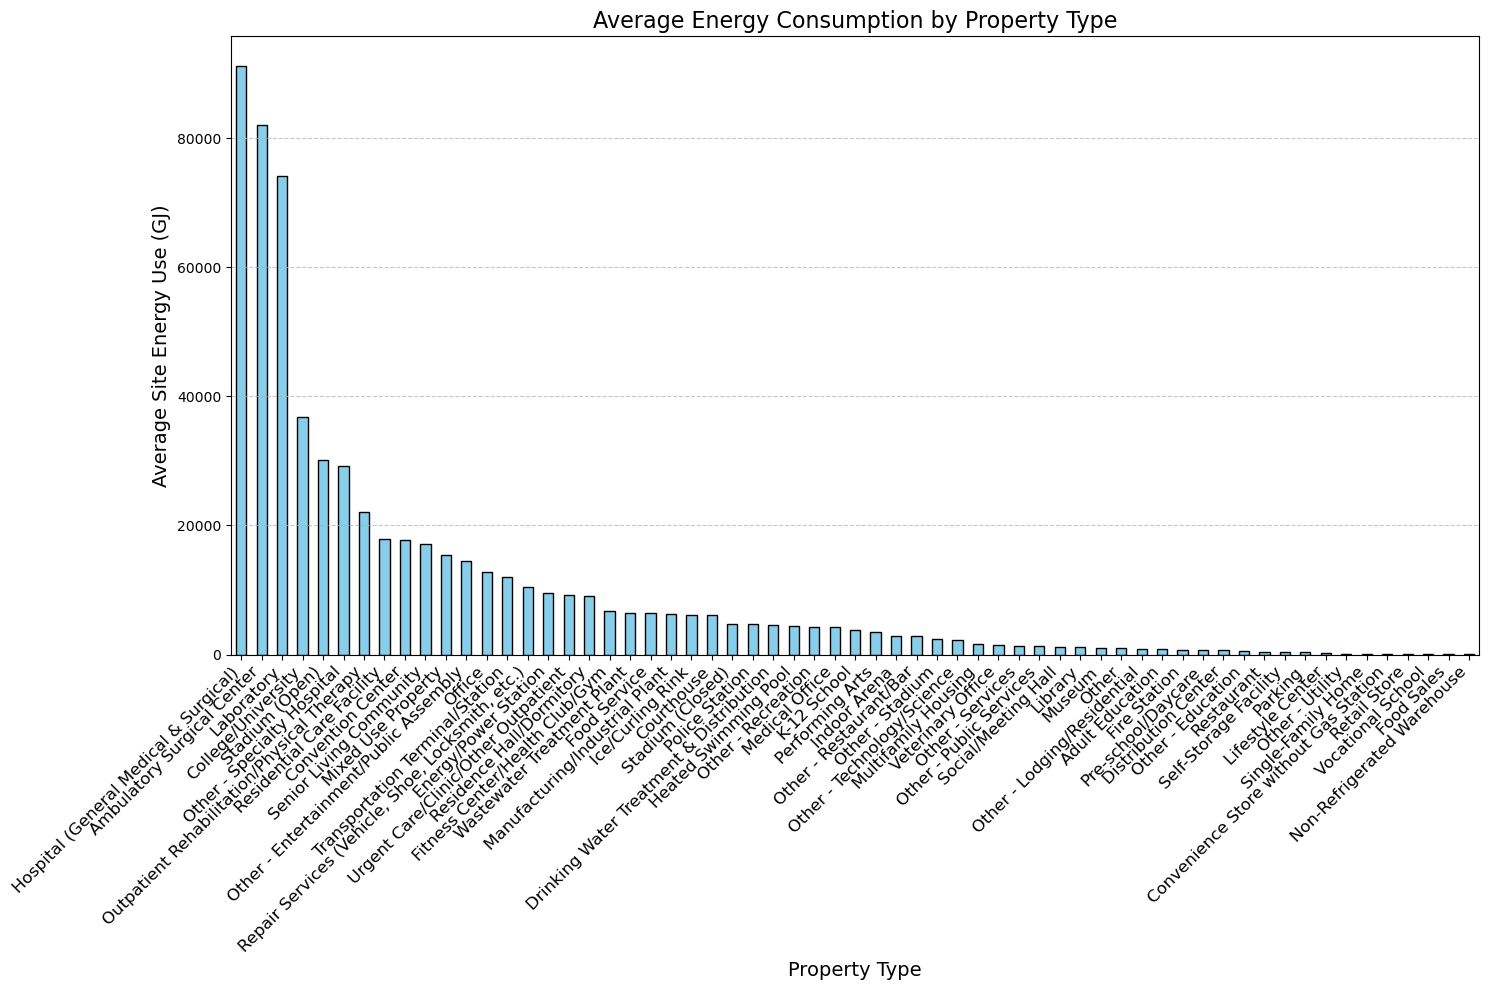

In [25]:

#Average energy consumption by different property types
energy_consumption_by_property_type = df.groupby('Primary Property Type - Self Selected')['Site Energy Use (GJ)'].mean()


# Display the statistical summary
print("Energy Consumption by property:")
print(energy_consumption_by_property_type)

# Plot the bar chart
plt.figure(figsize=(15, 10))
energy_consumption_by_property_type.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Energy Consumption by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Average Site Energy Use (GJ)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## GHG Emissions Analysis
Analyze greenhouse gas emissions data

Average GHG Emissions Intensity by Property Type:
Primary Property Type - Self Selected
Adult Education                            32.848438
Ambulatory Surgical Center               2839.400000
College/University                       1291.151295
Convenience Store without Gas Station       2.050000
Convention Center                         715.566667
                                            ...     
Transportation Terminal/Station           234.506150
Urgent Care/Clinic/Other Outpatient       298.041667
Veterinary Office                          66.200000
Vocational School                           0.200000
Wastewater Treatment Plant                141.695149
Name: Total (Location-Based) GHG Emissions (Metric Tons CO2e), Length: 61, dtype: float64


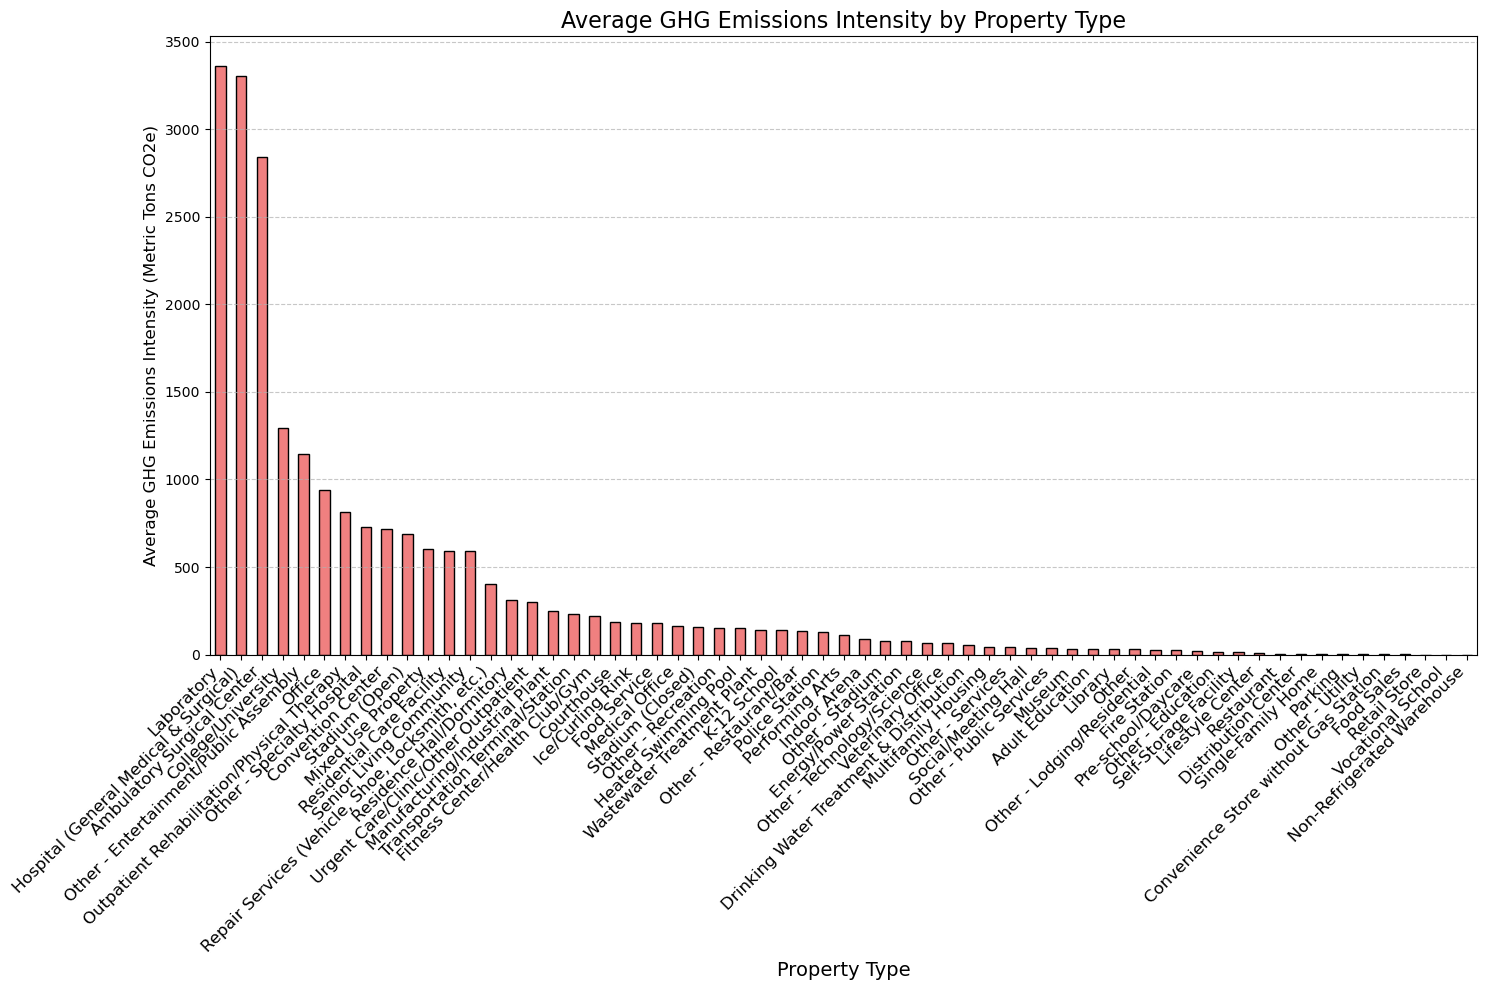

In [27]:
# Group by property type and calculate the mean emissions intensity
ghg_emissions_by_property_type = df.groupby('Primary Property Type - Self Selected')['Total (Location-Based) GHG Emissions (Metric Tons CO2e)'].mean()

# Display the grouped data
print("Average GHG Emissions Intensity by Property Type:")
print(ghg_emissions_by_property_type)

# Plot the bar chart
plt.figure(figsize=(15, 10))
ghg_emissions_by_property_type.sort_values(ascending=False).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average GHG Emissions Intensity by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Average GHG Emissions Intensity (Metric Tons CO2e)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Energy Consumption Trends
Visualize trends in energy consumption over time to identify patterns.

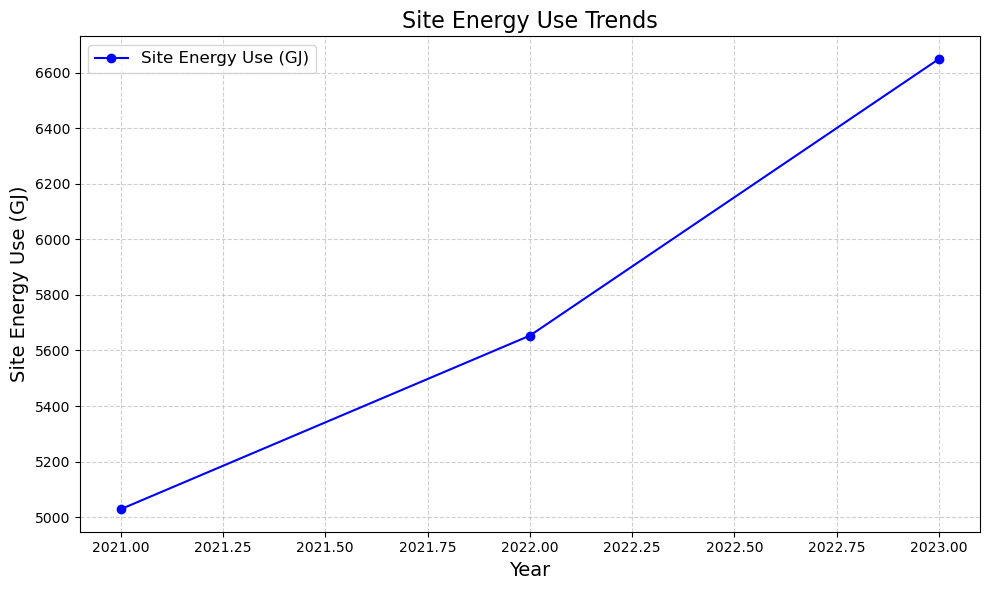

In [28]:
# Plot energy consumption trends over time
# Plot total energy consumption trends over time
import matplotlib.pyplot as plt
yearly_trends_energy = df.groupby('Year')['Site Energy Use (GJ)'].mean()
plt.figure(figsize=(10, 6))  
plt.plot(yearly_trends_energy, marker='o', linestyle='-', color='b', label='Site Energy Use (GJ)')
plt.title('Site Energy Use Trends', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Site Energy Use (GJ)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.legend(fontsize=12)
plt.tight_layout()  
plt.show()
plt.show()

## GHG Emissions Trends
Visualize trends in GHG emissions over time to identify patterns.

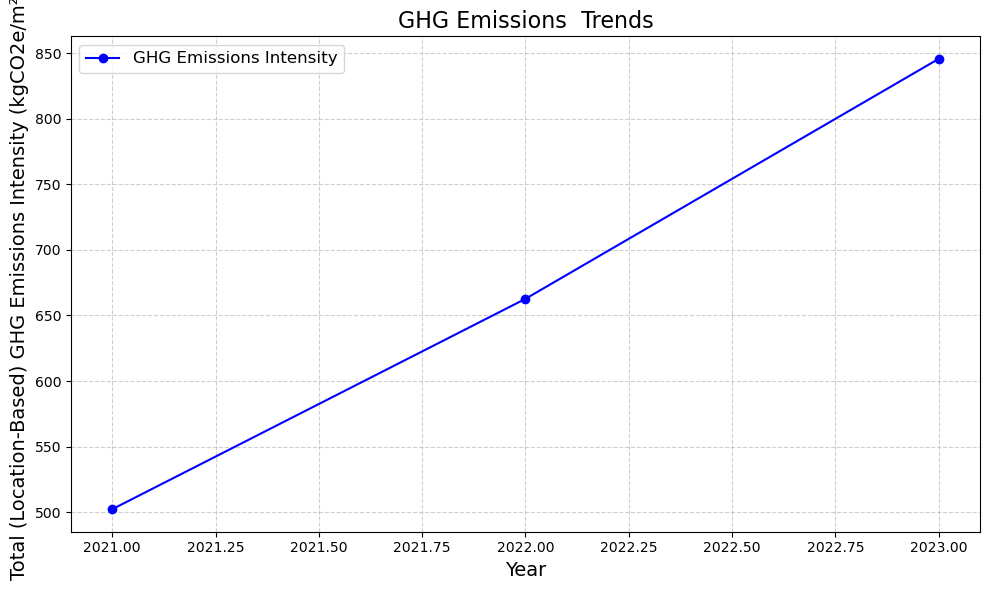

In [29]:
# GHG Emissions Trends

# Plot GHG emissions trends over time
import matplotlib.pyplot as plt
yearly_trends = df.groupby('Year')['Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)'].mean()
plt.figure(figsize=(10, 6))  
plt.plot(yearly_trends, marker='o', linestyle='-', color='b', label='GHG Emissions Intensity')
plt.title('GHG Emissions  Trends', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.legend(fontsize=12)
plt.tight_layout()  
plt.show()
plt.show()

## Comparison by City
Compare energy consumption and emissions across different cities in the dataset.

Energy and Emissions by City:
City
 Havelock                   23.500000
 Milton                    539.600000
 Oakville                 1398.933333
 South Mountain            193.000000
 Ste-Anne-de-Prescott      279.366667
                             ...     
halton hills              1635.000000
markham                  36487.033333
pembroke                    14.900000
sharbot Lake                 1.133333
windsor                    527.300000
Name: Site Energy Use (GJ), Length: 1258, dtype: float64


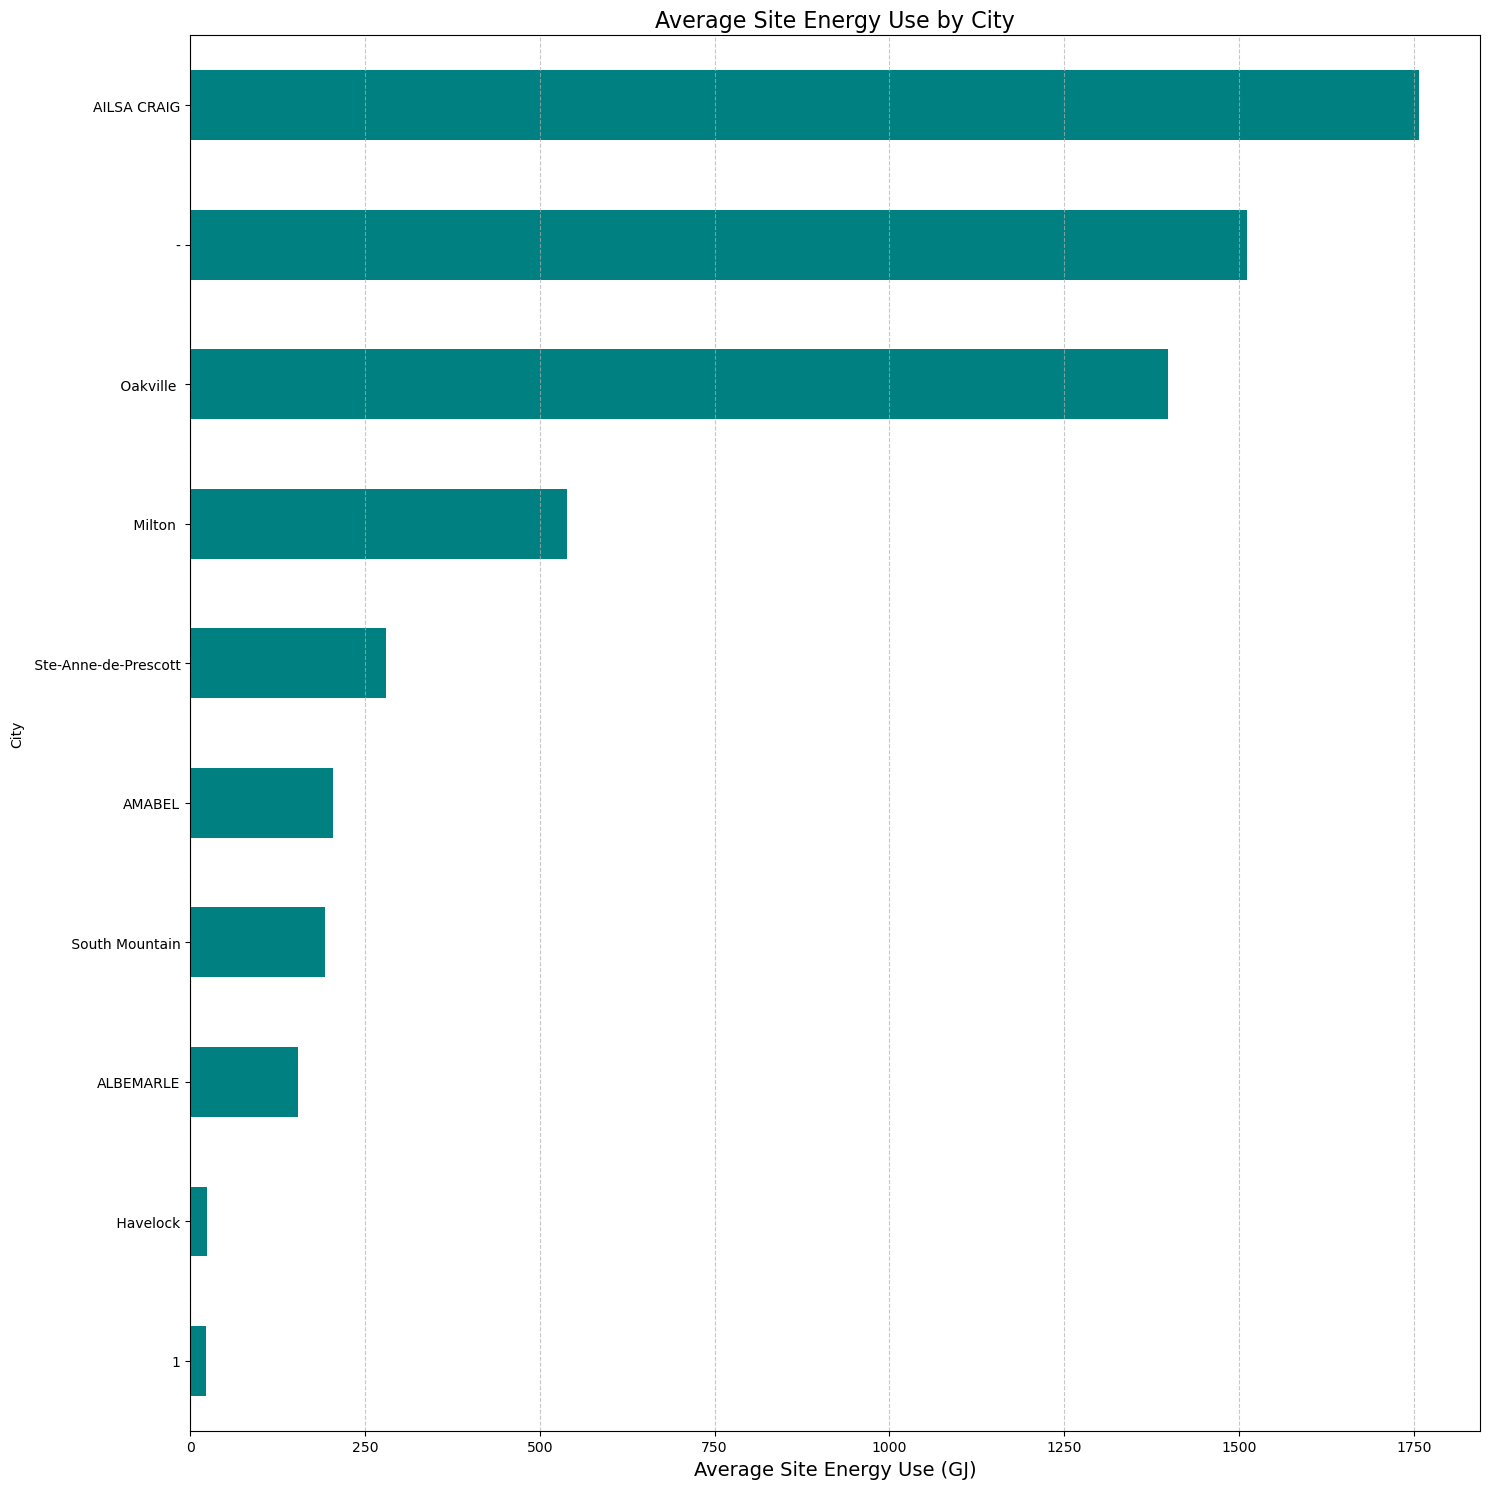

In [30]:
# Comparison by City

# Group by city and summarize energy consumption 
city_summary = df.groupby('City')['Site Energy Use (GJ)'].mean()

# Display summary
print("Energy and Emissions by City:")
print(city_summary)

plt.figure(figsize=(15, 15))
city_summary.head(10).sort_values().plot(kind='barh', color='teal')
plt.title('Average Site Energy Use by City', fontsize=16)
plt.xlabel('Average Site Energy Use (GJ)', fontsize=14)
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
## Correlation Analysis
Perform correlation analysis to identify relationships between energy consumption, emissions, and other variables.

In [ ]:
# statistics for energy use
print(df['Electricity Use - Grid Purchase (kWh)'].describe())

In [31]:
# Correlation Analysis

# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                                    Portfolio Manager Property ID  \
Portfolio Manager Property ID                                            1.000000   
Property GFA - Self-Reported (m²)                                       -0.006237   
Number of Buildings                                                      0.006733   
Electricity Use - Grid Purchase (kWh)                                   -0.000970   
Electricity Use - Grid Purchase (GJ)                                    -0.000970   
Natural Gas Use (therms)                                                -0.016099   
Natural Gas Use (GJ)                                                    -0.016099   
Fuel Oil #1 Use (GJ)                                                    -0.001855   
Fuel Oil #2 Use (GJ)                                                    -0.007878   
Fuel Oil #4 Use (GJ)                                                    -0.003357   
Fuel Oil #5 & 6 Use (GJ)                     

Focus on properties with the highest energy consumption and emissions for targeted interventions.
Promote energy-efficient technologies such as LED lighting and high-efficiency HVAC systems.
Encourage the use of renewable energy sources to reduce reliance on fossil fuels.
Implement regular energy audits to identify inefficiencies and track progress.

Track yearly changes in energy use/emissions.

In [9]:
#2. Compare Energy Usage Across Building Types
#  Average energy use by building type
building_type_stats = df.groupby('Primary Property Type - Self Selected')['Electricity Use - Grid Purchase (kWh)'].mean()
print(building_type_stats)

Primary Property Type - Self Selected
Adult Education                                      95084.411765
College/University                                  321727.807003
Convenience Store without Gas Station               334183.342161
Courthouse                                          595898.620000
Distribution Center                                 182836.500000
Drinking Water Treatment & Distribution             207113.095889
Fire Station                                        103343.327449
Fitness Center/Health Club/Gym                      424499.304875
Food Sales                                            4148.666667
Food Service                                        936708.433333
Heated Swimming Pool                                356280.397305
Hospital (General Medical & Surgical)               484242.908350
Ice/Curling Rink                                    490403.779034
Indoor Arena                                        209202.225098
K-12 School                           

In [14]:
#3. Analyze Correlation Between Variables
# Correlation matrix
corr_matrix = df[['Property GFA - Self-Reported (m²)', 'Electricity Use - Grid Purchase (kWh)']].corr()
print(corr_matrix)

                                       Property GFA - Self-Reported (m²)  \
Property GFA - Self-Reported (m²)                               1.000000   
Electricity Use - Grid Purchase (kWh)                           0.076766   

                                       Electricity Use - Grid Purchase (kWh)  
Property GFA - Self-Reported (m²)                                   0.076766  
Electricity Use - Grid Purchase (kWh)                               1.000000  


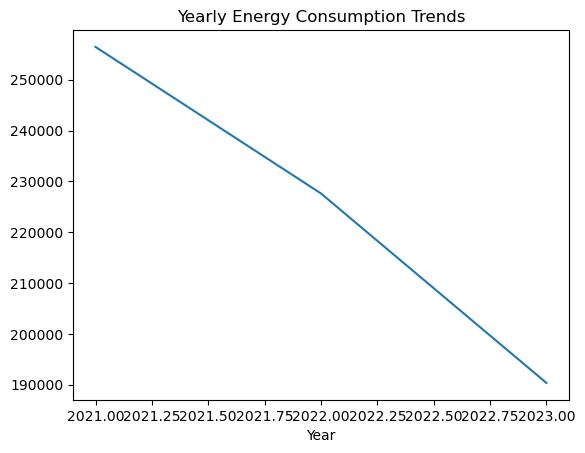

In [18]:
#4. Identification of Trends Over Time
#  Yearly energy use trends
import matplotlib.pyplot as plt
yearly_trends = df.groupby('Year')['Electricity Use - Grid Purchase (kWh)'].mean()
yearly_trends.plot(kind='line', title='Yearly Energy Consumption Trends')
plt.show()

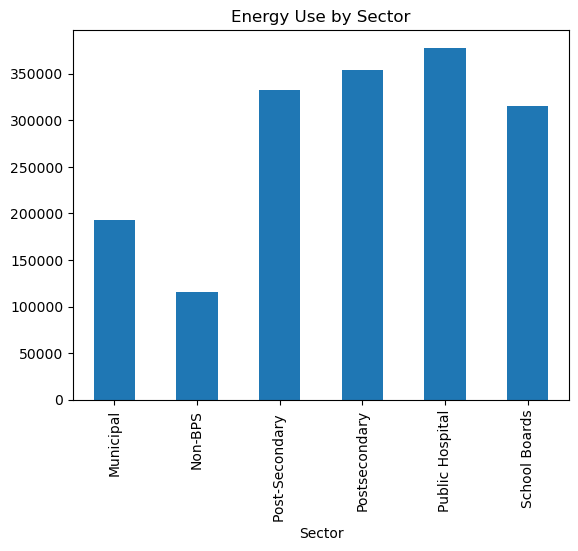

In [20]:
#5. Benchmarking Across Sectors
#  Energy use by sector
sector_comparison = df.groupby('Sector')['Electricity Use - Grid Purchase (kWh)'].mean()
sector_comparison.plot(kind='bar', title='Energy Use by Sector')
plt.show()

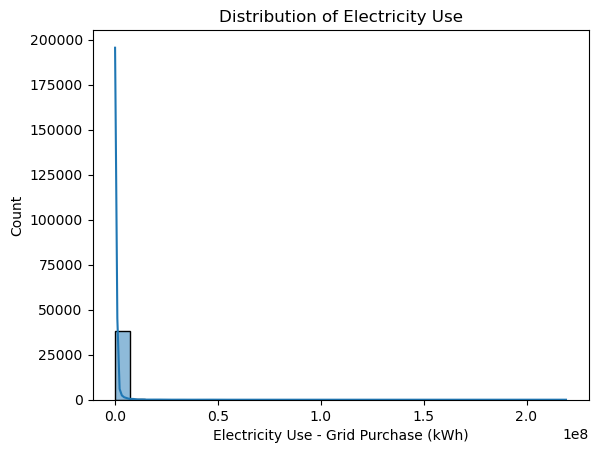

In [23]:
#6. Develop Visualizations
#Histogram of energy use
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Electricity Use - Grid Purchase (kWh)'], bins=30, kde=True)
plt.title('Distribution of Electricity Use')
plt.show()

Phase 3: Advanced Analysis & Predictive Modeling

1.Clustering Analysis
K-Means clustering is used to group buildings based on their energy use and other features.
Identification of common characteristics in high-energy-consuming buildings.

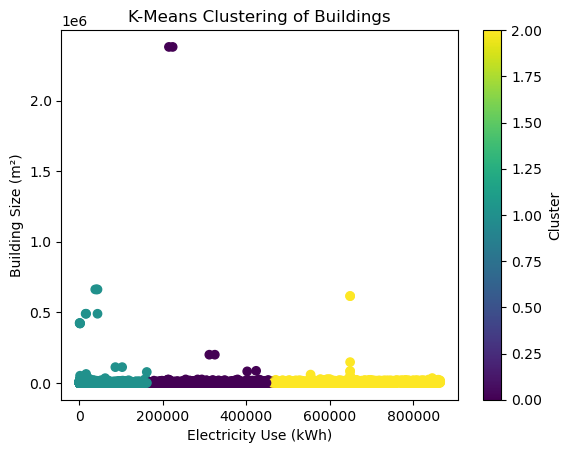


Cluster Characteristics:
         Electricity Use - Grid Purchase (kWh)  \
Cluster                                          
0                                284844.198244   
1                                 46160.197681   
2                                636759.438599   

         Property GFA - Self-Reported (m²)  
Cluster                                     
0                              4149.948984  
1                              1074.107210  
2                              3605.722526  


In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering ( energy use and building size)
X = df[['Electricity Use - Grid Purchase (kWh)', 'Property GFA - Self-Reported (m²)']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Buildings')
plt.xlabel('Electricity Use (kWh)')
plt.ylabel('Building Size (m²)')
plt.colorbar(label='Cluster')
plt.show()

# Analyze cluster characteristics
cluster_stats = df.groupby('Cluster')[['Electricity Use - Grid Purchase (kWh)', 'Property GFA - Self-Reported (m²)']].mean()
print("\nCluster Characteristics:")
print(cluster_stats)

2.Predictive Modeling
regression model implimentation to predict future energy consumption trends.
model validation the model using metrics like RMSE (Root Mean Squared Error) and R² (R-squared).


Model Evaluation:
RMSE: 224682.48071630474
R²: 0.015135884291557655


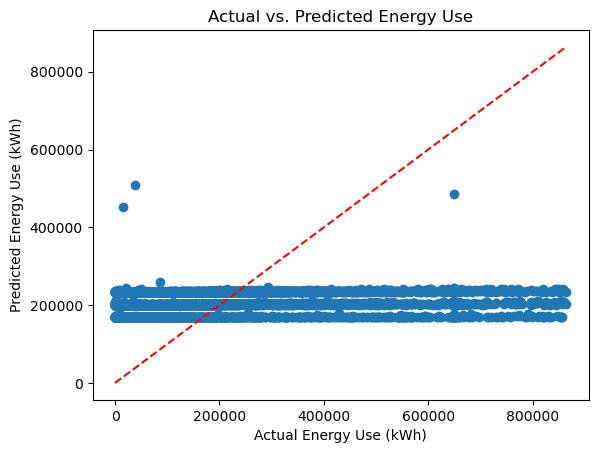

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = df[['Property GFA - Self-Reported (m²)', 'Year']]  # Features
y = df['Electricity Use - Grid Purchase (kWh)']       # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Visualize predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Predicted Energy Use')
plt.xlabel('Actual Energy Use (kWh)')
plt.ylabel('Predicted Energy Use (kWh)')
plt.show()

3. Feature Importance Analysis
Identification of key factors driving high emissions using feature importance analysis.


Feature Importance:
                             Feature  Importance
0  Property GFA - Self-Reported (m²)    0.949198
1                               Year    0.050802


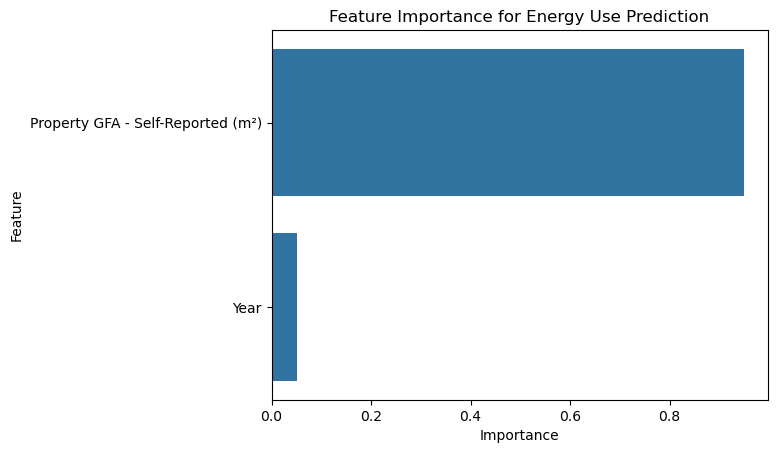

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model for feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Visualize feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Energy Use Prediction')
plt.show()

# Summary of clustering results

Cluster Characteristics:
         Electricity Use - Grid Purchase (kWh)  \
Cluster                                          
0                                284844.198244   
1                                 46160.197681   
2                                636759.438599   

         Property GFA - Self-Reported (m²)  
Cluster                                     
0                              4149.948984  
1                              1074.107210  
2                              3605.722526  

Model Evaluation:
RMSE: 224682.48071630474
R²: 0.015135884291557655

Feature Importance:
                             Feature  Importance
0  Property GFA - Self-Reported (m²)    0.949198
1                               Year    0.050802


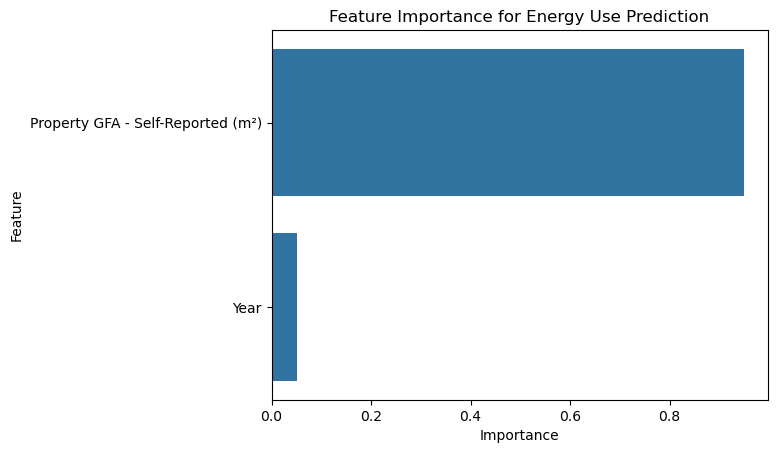

In [71]:
# Summary of clustering results
print("Cluster Characteristics:")
print(cluster_stats)

# Summary of predictive model performance
print("\nModel Evaluation:")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Summary of feature importance
print("\nFeature Importance:")
print(feature_importance_df)

# to show feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Energy Use Prediction')
plt.show()